<a href="https://colab.research.google.com/github/Leonardobern10/Portfolio/blob/main/Valor_da_produ%C3%A7%C3%A3o_de_ve%C3%ADculos_automotores_no_Pa%C3%ADs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/bcdata.sgs.1373.csv', sep = ';')
dados

,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055
...,...,...
354,01/07/2022,218950
355,01/08/2022,237961
356,01/09/2022,207762
357,01/10/2022,206044


In [3]:
from datetime import datetime

In [4]:
dateparse = lambda dates: datetime.strptime(dates, '%d/%m/%Y')
dados = pd.read_csv('/content/bcdata.sgs.1373.csv', sep = ';',
                    parse_dates = ['data'], index_col = 'data',
                    date_parser = dateparse)

In [5]:
dados

,valor
data,
1993-01-01,66168
1993-02-01,73042
1993-03-01,98691
1993-04-01,88839
1993-05-01,101055
...,...
2022-07-01,218950
2022-08-01,237961
2022-09-01,207762


In [6]:
st = dados['valor']
st

data
1993-01-01     66168
1993-02-01     73042
1993-03-01     98691
1993-04-01     88839
1993-05-01    101055
               ...  
2022-07-01    218950
2022-08-01    237961
2022-09-01    207762
2022-10-01    206044
2022-11-01    215796
Name: valor, Length: 359, dtype: int64

In [94]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

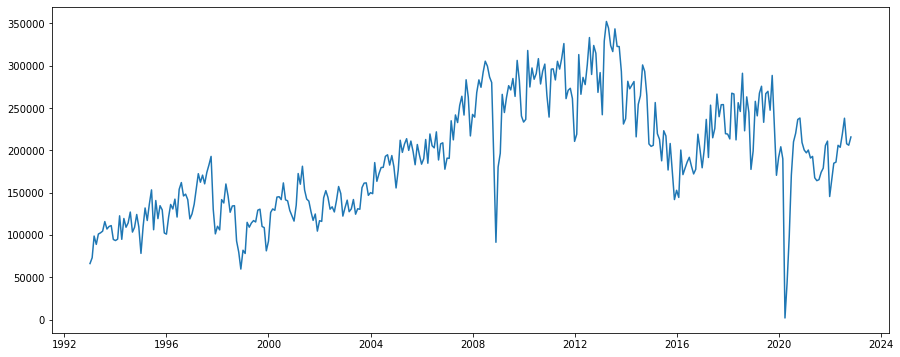

In [95]:
plt.plot(st)

In [96]:
st.describe()

count       359.000000
mean     192961.523677
std       67440.390314
min        1847.000000
25%      136171.000000
50%      190099.000000
75%      243578.000000
max      352328.000000
Name: valor, dtype: float64

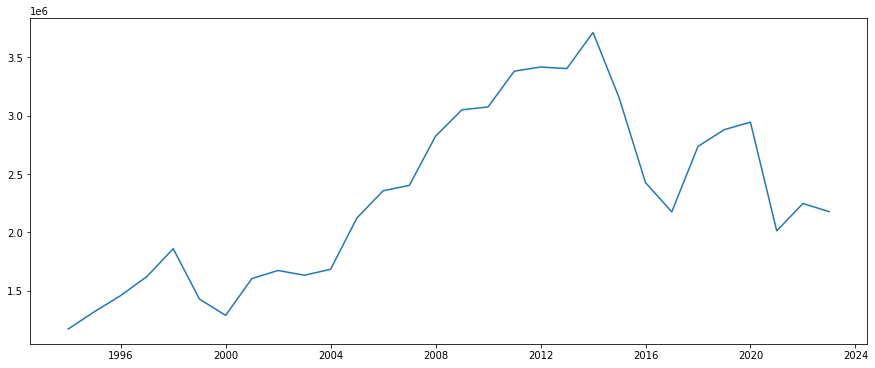

In [97]:
st_ano = st.resample('A').sum()
plt.plot(st_ano)

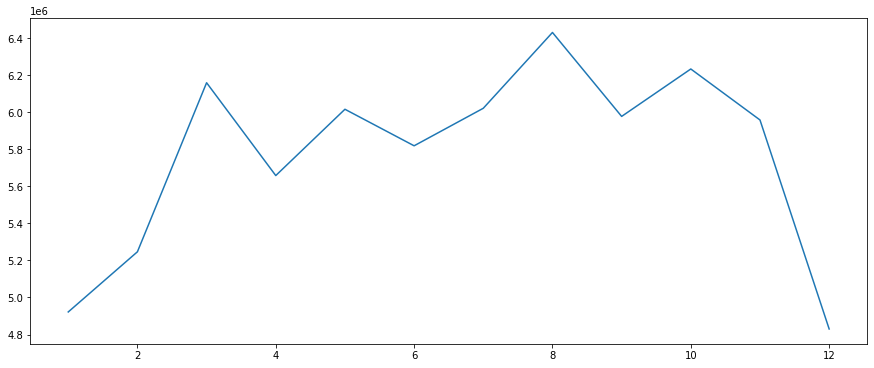

In [98]:
st_mes = st.groupby([lambda x: x.month]).sum()
plt.plot(st_mes)

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [100]:
decomposiçao = seasonal_decompose(st)

In [101]:
tendencia = decomposiçao.trend
tendencia

data
1993-01-01   NaN
1993-02-01   NaN
1993-03-01   NaN
1993-04-01   NaN
1993-05-01   NaN
              ..
2022-07-01   NaN
2022-08-01   NaN
2022-09-01   NaN
2022-10-01   NaN
2022-11-01   NaN
Name: trend, Length: 359, dtype: float64

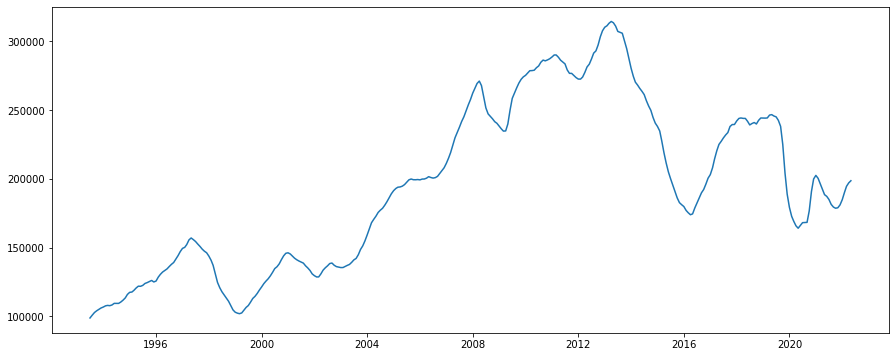

In [102]:
plt.plot(tendencia)

In [103]:
sazonalidade = decomposiçao.seasonal
sazonalidade

data
1993-01-01   -27079.354376
1993-02-01   -16454.667595
1993-03-01    13815.440164
1993-04-01    -3410.529664
1993-05-01     8223.953095
                  ...     
2022-07-01     7238.226084
2022-08-01    20449.137003
2022-09-01     5605.349647
2022-10-01    14229.721773
2022-11-01     4109.751946
Name: seasonal, Length: 359, dtype: float64

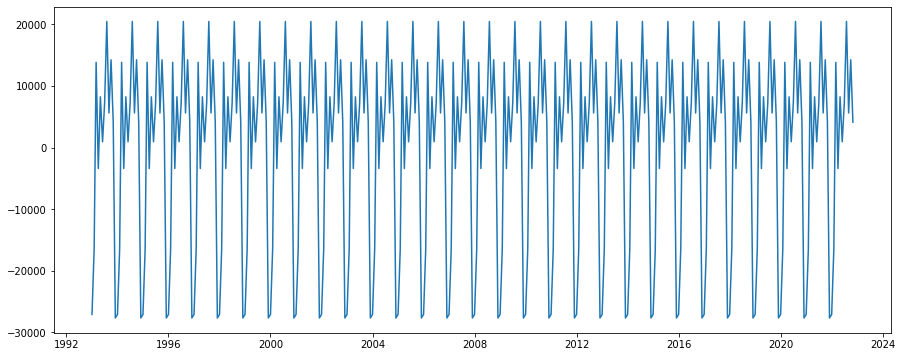

In [104]:
plt.plot(sazonalidade)

In [105]:
aleatorio = decomposiçao.resid
aleatorio

data
1993-01-01   NaN
1993-02-01   NaN
1993-03-01   NaN
1993-04-01   NaN
1993-05-01   NaN
              ..
2022-07-01   NaN
2022-08-01   NaN
2022-09-01   NaN
2022-10-01   NaN
2022-11-01   NaN
Name: resid, Length: 359, dtype: float64

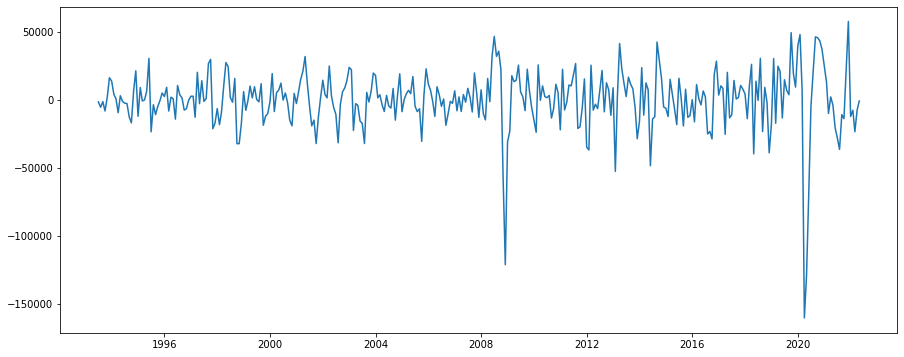

In [106]:
plt.plot(aleatorio)

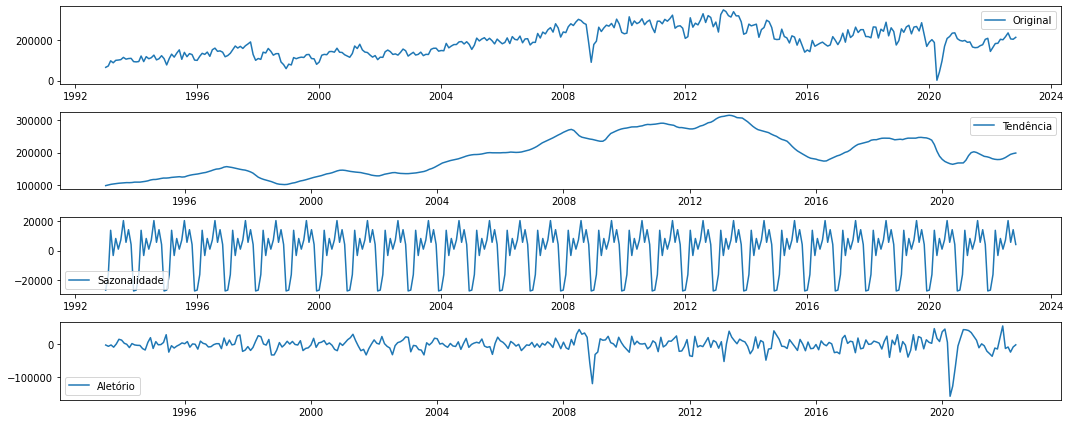

In [107]:
plt.subplot(4,1,1)
plt.plot(st, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonalidade, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()

In [80]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from pmdarima.arima import auto_arima

In [138]:
stepwise_model = auto_arima(dados, start_p = 1, start_q = 1,
                           start_d = 0, start_P = 0, max_p = 10,
                           m = 12, seasonal = True, trace = True,
                           stepwise = False)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8378.249, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=8353.428, Time=0.17 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=8350.030, Time=0.57 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8346.487, Time=0.22 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=8315.241, Time=1.22 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=8341.953, Time=0.45 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=8315.129, Time=1.16 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=8311.237, Time=1.64 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8361.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8333.857, Time=0.27 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=8329.080, Time=0.74 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=8325.386, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=8297.163, Time=0.60 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=8299.159, Time=1.48 sec


In [139]:
print(stepwise_model.aic())

8292.153724537173


In [140]:
treino = dados.loc['1993-01-01':'2021-12-01']
teste = dados.loc['2022-01-01':]
teste

,valor
data,
2022-01-01,145417
2022-02-01,165935
2022-03-01,184786
2022-04-01,186037
2022-05-01,205916
2022-06-01,203598
2022-07-01,218950
2022-08-01,237961
2022-09-01,207762


In [141]:
stepwise_model.fit(treino)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [150]:
future_forecast = stepwise_model.predict(n_periods = 21)
future_forecast

2022-01-01    199075.000832
2022-02-01    210906.731932
2022-03-01    224919.781466
2022-04-01    199120.349049
2022-05-01    206402.851347
2022-06-01    205103.546546
2022-07-01    220024.296950
2022-08-01    235015.481210
2022-09-01    224841.106123
2022-10-01    240221.197964
2022-11-01    235873.500826
2022-12-01    213640.686066
2023-01-01    214742.278823
2023-02-01    225242.224236
2023-03-01    239622.898970
2023-04-01    214689.026420
2023-05-01    222530.112451
2023-06-01    220939.105385
2023-07-01    235875.174667
2023-08-01    249826.146018
2023-09-01    240898.316992
Freq: MS, dtype: float64

In [151]:
future_forecast = pd.DataFrame(future_forecast,index = teste.index,columns = ['valor'])

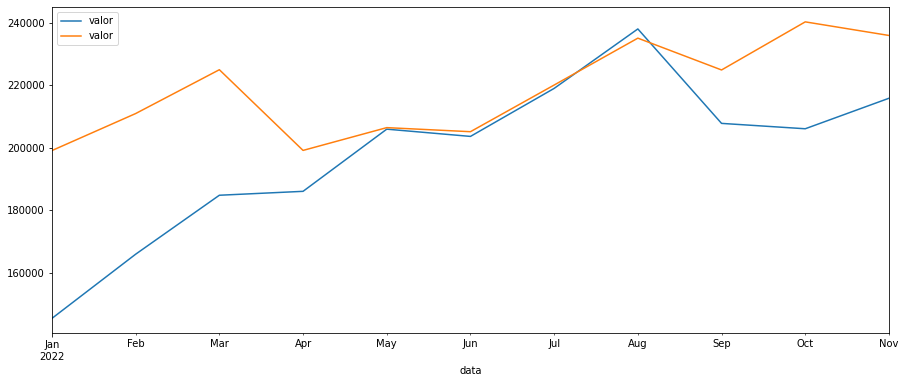

In [152]:
pd.concat([teste, future_forecast],axis=1).plot()

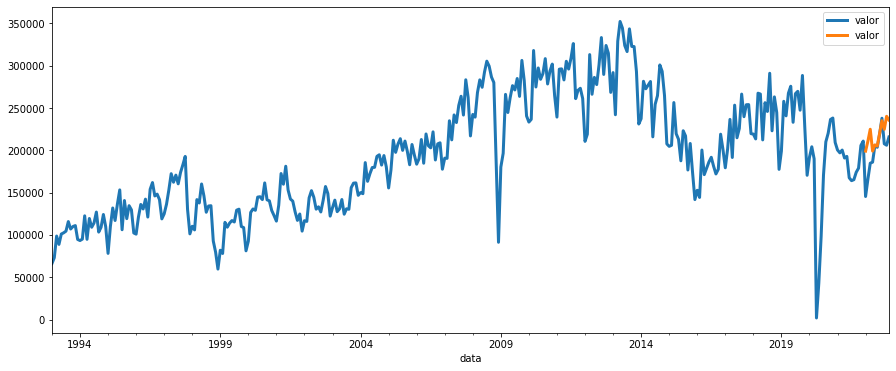

In [153]:
pd.concat([dados,future_forecast],axis=1).plot(linewidth=3)